# L0.2 - Tools for image processing

In this lab you will familiarise yourself with some image processing tools that will help you to accomplish the subsequent labs and projects in this course. This comprises several python libraries (_Numpy_, _SciPy_, _matplotlib_, _scikit-image_, _SimpleITK_) as well as the software _MeVisLab_.

Intended time: **max 1.5 hours** <img src="scipy.jpeg" width="160px" style="display:inline" align="right"> <img src="simpleitk.png" width="160px" style="display:inline" align="right"> <img src="matplotlib.png" width="300px" style="display:inline" align="right">

Questions to: **daniel.jorgens@sth.kth.se**

<img src="numpy.jpeg" width="190px" style="display:inline" align="left">  <img src="skimage.jpeg" width="370px" style="display:inline" align="middle"> <img src="mevislab.jpeg" width="90px" style="display:inline" align="right">

### References

 1. https://docs.scipy.org/doc/numpy-1.14.0/reference/index.html: _Numpy_ reference list. Overview of all functionality in _Numpy_. Of course, the famous _ndarray_ class is listed on top.
 2. https://docs.scipy.org/doc/scipy/reference/: _SciPy_ reference list. Overview of all subpackages as well as corresponding tutorials in _SciPy_. For us the package _ndimage_ is mainly interesting for us.
 3. http://scikit-image.org/docs/stable/: A good start into the _scikit-image_ documentation. Use the search functionality if you roughly know what you are looking for.
 4. http://www.simpleitk.org/SimpleITK/help/documentation.html: The main page for the _SimpleITK_ documentation. You will find a reference guide for the C++ implementation. However, it is automatically generated, not the most convenient to read and not the best for our purposes (as we use Python). However, there are a lot of example notebooks available at http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/.
 5. https://matplotlib.org/api/pyplot_summary.html: This is the documentation of the _pyplot_ subpackage of _matplotlib_ which is imitating the Matlab plotting behaviour. The whole _matplotlib_ doc is available at https://matplotlib.org/index.html.

# Numpy <img src="numpy.jpeg" width="200px" style="display:inline" align="right">

The main functionality provided by the _Numpy_ library is the _ndarray_. It is a very powerful container for almost any datatype which adds array functionality to the Python language. (Natively, arrays would need to be constructed as 'lists of lists'.) Here, we point out some basic usage of that class. For a full overview, have a look at **[Ref 1]**.

In [3]:
import numpy as np

## Ndarray

### Construction

A simple way of constructing an _ndarray_ from given data is to give the data as a list structure.

In [4]:
# create data in a list #
l = [1, -2.3, 3, 4] * 5  # Do you recall what multiplication with a scalar means for a 'list'? #

# create 'ndarray' #
arr = np.array(l)

# TODO: print type and value of the array #
print("'arr' is of type {} and has value {}.".format(type(arr),arr))

'arr' is of type <class 'numpy.ndarray'> and has value [ 1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3
  3.   4.   1.  -2.3  3.   4. ].


The obtained array is one-dimensional. As mentioned above, one can imitate array behaviour natively in Python by creating a list of lists. In that way it is also possible to create _n_-dimensional ndarrays.

In [19]:
# create two-dimensional list #
l2 = [[i * val for val in l] for i in range(5)]  # Do you recall list comprehensions? Here, we use two interleaved ones. #

# TODO: create 'ndarray' #
arr2 = np.array(l2)

# TODO: the dimension of an 'ndarray' is accessible by the attribute 'ndim' #
print("'arr2' is of dimension {} and has value {}.".format(len(arr2.shape),arr2))

'arr2' is of dimension 2 and has value [[ 0.  -0.   0.   0.   0.  -0.   0.   0.   0.  -0.   0.   0.   0.  -0.
   0.   0.   0.  -0.   0.   0. ]
 [ 1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3
   3.   4.   1.  -2.3  3.   4. ]
 [ 2.  -4.6  6.   8.   2.  -4.6  6.   8.   2.  -4.6  6.   8.   2.  -4.6
   6.   8.   2.  -4.6  6.   8. ]
 [ 3.  -6.9  9.  12.   3.  -6.9  9.  12.   3.  -6.9  9.  12.   3.  -6.9
   9.  12.   3.  -6.9  9.  12. ]
 [ 4.  -9.2 12.  16.   4.  -9.2 12.  16.   4.  -9.2 12.  16.   4.  -9.2
  12.  16.   4.  -9.2 12.  16. ]].


### Convenient construction

There exist many functions that ease the construction of ndarrays in some cases (similar as in Matlab e.g. 'ones' or 'zeros')

In [7]:
# initialise with 0 (default) #
arr_zeros = np.zeros(shape=(5, 3))
print("'arr_zeros': \n{}\n".format(arr_zeros))

arr_def = np.zeros(shape=(5, 3))
print("'arr_def': \n{}\n".format(arr_def))

# initialise with 1 #
arr_ones = np.ones(shape=(3, 3))
print("'arr_ones': \n{}\n".format(arr_ones))

'arr_zeros': 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

'arr_def': 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

'arr_ones': 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]



For initialisation with random numbers the syntax looks slightly different.

In [8]:
# initialise with UNIFORMLY distributed random numbers #
arr_rand_UNI = np.random.rand(4, 2)
print("'arr_rand_UNI': \n{}\n".format(arr_rand_UNI))

# initialise with NORMALLY distributed random numbers #
arr_rand_NORM = np.random.randn(4, 2)
print("'arr_rand_NORM': \n{}\n".format(arr_rand_NORM))

'arr_rand_UNI': 
[[0.25659047 0.60585229]
 [0.77973312 0.38679195]
 [0.68730026 0.53724246]
 [0.32633631 0.25693158]]

'arr_rand_NORM': 
[[ 0.10839115 -0.57962287]
 [-1.05642957 -0.11492077]
 [ 0.2610322   2.43629771]
 [-1.12711444  1.38683801]]



Sometimes useful for image processing (similar to Matlab's linspace):

In [9]:
# initialise range with certain number of points #
arr_lp = np.linspace(10, 100, 9)

print("'arr_lp': \n{}".format(arr_lp))

'arr_lp': 
[ 10.    21.25  32.5   43.75  55.    66.25  77.5   88.75 100.  ]


### Properties

An 'ndarray' features several properties that can be conveniently queried directly on the object.

##### Task 1.1

Check https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html to complete the code in the following cells!

In [41]:
# dict to store the properties #
props = dict()
import statistics
# collect properties of 'arr2' #
mx=np.zeros(shape=(arr2.shape[1]))
mn=np.zeros(shape=(arr2.shape[1]))
props['number of dimensions'] = len(arr2.shape)
props['shape'] = arr2.shape
props['maximum value'] = max(arr2.flatten())
props['minimum value'] = min(arr2.flatten())
props['mean value'] = np.mean(arr2.flatten())    
props['standard deviation'] = statistics.stdev(arr2.flatten())

# print the properties #
print("Properties of 'arr2': \n")
for key, value in props.items():
    print(" {}: {}".format(key, value))

Properties of 'arr2': 

 number of dimensions: 2
 shape: (5, 20)
 maximum value: 16.0
 minimum value: -9.2
 mean value: 2.8500000000000005
 standard deviation: 6.261353324525414


Further, there are some useful transforms available.

In [43]:
# TODO: obtain a one-dimensional version of 'arr2' #
arr2_1d = arr2.flatten()
print("'arr2_1d': \n{}".format(arr2_1d))

'arr2_1d': 
[ 0.  -0.   0.   0.   0.  -0.   0.   0.   0.  -0.   0.   0.   0.  -0.
  0.   0.   0.  -0.   0.   0.   1.  -2.3  3.   4.   1.  -2.3  3.   4.
  1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3  3.   4.   2.  -4.6
  6.   8.   2.  -4.6  6.   8.   2.  -4.6  6.   8.   2.  -4.6  6.   8.
  2.  -4.6  6.   8.   3.  -6.9  9.  12.   3.  -6.9  9.  12.   3.  -6.9
  9.  12.   3.  -6.9  9.  12.   3.  -6.9  9.  12.   4.  -9.2 12.  16.
  4.  -9.2 12.  16.   4.  -9.2 12.  16.   4.  -9.2 12.  16.   4.  -9.2
 12.  16. ]


In [45]:
# TODO: transpose 'arr2' #
arr2_t = arr2.T
print("'arr2_t': \n{}".format(arr2_t))

'arr2_t': 
[[ 0.   1.   2.   3.   4. ]
 [-0.  -2.3 -4.6 -6.9 -9.2]
 [ 0.   3.   6.   9.  12. ]
 [ 0.   4.   8.  12.  16. ]
 [ 0.   1.   2.   3.   4. ]
 [-0.  -2.3 -4.6 -6.9 -9.2]
 [ 0.   3.   6.   9.  12. ]
 [ 0.   4.   8.  12.  16. ]
 [ 0.   1.   2.   3.   4. ]
 [-0.  -2.3 -4.6 -6.9 -9.2]
 [ 0.   3.   6.   9.  12. ]
 [ 0.   4.   8.  12.  16. ]
 [ 0.   1.   2.   3.   4. ]
 [-0.  -2.3 -4.6 -6.9 -9.2]
 [ 0.   3.   6.   9.  12. ]
 [ 0.   4.   8.  12.  16. ]
 [ 0.   1.   2.   3.   4. ]
 [-0.  -2.3 -4.6 -6.9 -9.2]
 [ 0.   3.   6.   9.  12. ]
 [ 0.   4.   8.  12.  16. ]]


### Indexing

Indexing works as usual in Python based on brackets ('[...]'). Different approaches of indexing exist.

In [48]:
# access single element #
print("arr2[1, 2] = {}".format(arr2[1, 2]))

# access second row #
print("arr2[1] = {}".format(arr2[1]))

# alternative way to access second row #
print("arr2[1, :] = {}".format(arr2[1,:]))

# access submatrix #
print("arr2[1:3, 2:4] = {}".format(arr2[1:3, 2:4]))

# non-contiguous selection of elements #
print("arr2[1:6:2, 2:4] = {}".format(arr2[1:6:2, 2:4]))

arr2[1, 2] = 3.0
arr2[1] = [ 1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3
  3.   4.   1.  -2.3  3.   4. ]
arr2[1, :] = [ 1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3  3.   4.   1.  -2.3
  3.   4.   1.  -2.3  3.   4. ]
arr2[1:3, 2:4] = [[3. 4.]
 [6. 8.]]
arr2[1:6:2, 2:4] = [[ 3.  4.]
 [ 9. 12.]]


### Mathematical operators

Mathematical operators work element-wise as one would intuitively expect.

##### Task 1.2

Apply mathematical operators in the following code snippet.

In [49]:
# TODO: create two three-dimensional arrays with random numbers #
a1 = np.random.rand(2,2,2)
a2 = np.random.rand(2,2,2)

In [50]:
# TODO: 'ndarray' [op] 'ndarray' #
print("a1 + a2 = {}".format(a1+a2))
print("a1 * a2 = {}".format(a1*a2))
print("a1 // a2 = {}".format(a1//a2))

a1 + a2 = [[[0.7022158  1.51285875]
  [0.55553074 1.09308127]]

 [[0.4846523  1.54921793]
  [1.24302334 1.4336315 ]]]
a1 * a2 = [[[0.01317526 0.56898475]
  [0.07622776 0.29869366]]

 [[0.05755313 0.59453711]
  [0.38352233 0.47491924]]]
a1 // a2 = [[[0. 0.]
  [1. 0.]]

 [[1. 1.]
  [1. 0.]]]


In [51]:
# TODO: 'scalar' [op] 'ndarray' #
print("3.4 * a2 = {}".format(3.4*a2))
print("a1 + -4.3 = {}".format(a1-4.3))

3.4 * a2 = [[[2.32193942 2.7642125 ]
  [0.84094836 1.87049753]]

 [[0.70766916 2.38193403]
  [1.93469894 3.10780651]]]
a1 + -4.3 = [[[-4.28070756 -3.60014492]
  [-3.99180701 -3.75706506]]

 [[-4.02348569 -3.4513509 ]
  [-3.62600576 -3.78042924]]]


Outer and inner product operations are as follows.

In [52]:
# TODO: create two one-dimensional 'ndarrays' (i.e. vectors) with random numbers #
v1 = np.random.rand(5)
v2 = np.random.rand(5)

In [53]:
# TODO: compute the outer product #
outer_prod = np.outer(v1,v2)
print('outer_prod: {}'.format(outer_prod))

outer_prod: [[0.14457036 0.06743295 0.1489748  0.20759964 0.19603184]
 [0.48171348 0.22468895 0.49638923 0.69172922 0.65318491]
 [0.47993839 0.22386098 0.49456007 0.68918024 0.65077796]
 [0.0744665  0.03473393 0.07673518 0.10693215 0.10097371]
 [0.1665482  0.07768423 0.17162221 0.2391593  0.22583294]]


In [54]:
# TODO: compute the inner product (i.e. scalar/dot product) #
inner_prod = np.inner(v1,v2)
print('inner_prod: {}'.format(inner_prod))

inner_prod: 1.196584466971543


In [55]:
# TODO: there is an alternative way of writing the inner product using the '@' operator; try it! #
inner_prod2 = v1@v2
print('inner_prod2: {}'.format(inner_prod2))

inner_prod2: 1.196584466971543


### Comparison operators

Also comparison operators work element-wise as expected. This is often useful for simple thresholding in order to create a binary mask for an image.

In [56]:
# TODO: compare 'a1' and 'a2' #
print("a1 > a2 = {}".format(a1>a2))

# TODO: threshold 'a1' with a scalar #
a1_thresh = a1>0.4
print("a1_thresh = {}".format(a1_thresh))  # TODO: How many 'True' values do you expect on average??
# Numbers are randomly generated, so we expect as many Trues as (1-threshold)*number of elements in array, in average

a1 > a2 = [[[False False]
  [ True False]]

 [[ True  True]
  [ True False]]]
a1_thresh = [[[False  True]
  [False  True]]

 [[False  True]
  [ True  True]]]


### Logical operators

Logical operations are not defined for 'ndarrays'. But there are functions for common tasks.

In [59]:
# complement of 'a1_thresh' (hint: use the 'not' operator; this will cause an error) #
not a1_thresh

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

##### Task 1.3

Try out the two proposed functions in the previous error message! What is their meaning?

In [60]:
# TODO: try out the two proposed functions in the previous error message #
print(not a1_thresh.all)
print(not a1_thresh.any)

False
False


An alternative way of merging two masks is using element-wise mathematical operators on the boolean 'ndarrays'. But for getting a bit closer to images we introduce a way to plot the arrays first.

# Matplotlib <img src="matplotlib.png" width="250px" style="display:inline" align="right">

This library provides plotting functionality very similar to what is available in Matlab. For this purpose we use the subpackage _pyplot_ usually imported as _plt_.

In [2]:
import matplotlib.pyplot as plt

Useful for image processing purposes are the functions
 * _figure_  -  to create a new figure
 * _subplot_  -  to arrange several subfigures alongside each other
 * _imshow_  -  to plot an actual image (NOTE: The image must be 2D!)
 * _show_  -  to ultimately make the current figure visible

We have a look at an example to plot a slice of 'a1' and the same slice in the thresholded array 'a1_thresh'.

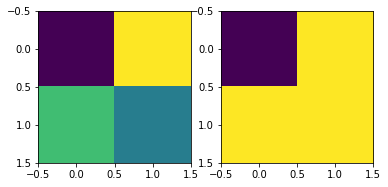

In [62]:
# define image slice to plot #
slice_idx = 1

# create a new figure #
plt.figure()

# define subplot layout (arg1 and arg2) and the position in the layout (arg3) #
plt.subplot(1, 2, 1)

# plot slice 'slice_idx' of 'a1' #
plt.imshow(a1[slice_idx])

# define next subplot #
plt.subplot(1, 2, 2)

# plot slice 'slice_idx' of 'a1_thresh' #
plt.imshow(a1_thresh[slice_idx])

# make this figure visible #
plt.show()

With this tool you can now apply the elementwise mathematical operators to merge two mask (i.e. boolean) 'ndarrays'.

##### Task 2.1

Multiply and add two masks with each other. What is the meaning of the respective operation?

In [64]:
# TODO: threshold 'a2' as well #
a2_thresh = a2>0.5

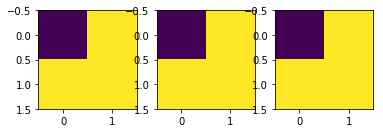

In [65]:
# TODO: MULTIPLY 'a1_thresh' and 'a2_thresh' elementwise #
mask_mult = a1_thresh*a2_thresh

# plot results #
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(a1_thresh[1])
plt.subplot(1, 3, 2)
plt.imshow(a2_thresh[1])
plt.subplot(1, 3, 3)
plt.imshow(mask_mult[1])
plt.show()

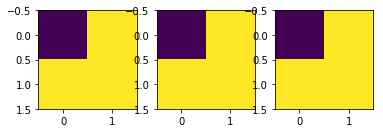

In [66]:
# TODO: ADD 'a1_thresh' and 'a2_thresh' elementwise #
mask_add = a1_thresh+a2_thresh

# plot results #
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(a1_thresh[1])
plt.subplot(1, 3, 2)
plt.imshow(a2_thresh[1])
plt.subplot(1, 3, 3)
plt.imshow(mask_add[1])
plt.show()

# Scipy <img src="scipy.jpeg" width="100px" style="display:inline" align="right">

The _SciPy stack_ contains a collection of useful functions commonly used in scientific tasks. While the _Numpy ndarray_ is the most famous core package, several subpackages of the _SciPy library_ use this data structure for various functions solving common problems (see **[Ref 2]** for a list of the different contents covered by the scipy collection).

Of course, for our purposes the _ndimage_ subpackage is the most useful. In the following you will go through one example, but be sure that there will be more to come in the upcomming labs... ;)

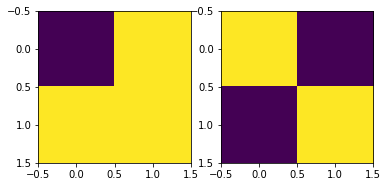

In [68]:
# TODO: import 'rotate' from subpackage 'ndimage' #
from scipy import ndimage
from scipy.ndimage import rotate
# ... #  # HINT: look at previous import statements #

# define a rotation angle #
angle = 90

# define rotation plane as (axis1, axis2) #
axes = (1, 2)

# define interpolation order as nearest neighbour #
order = 0

# TODO: rotate the multiplication mask; specify the arguments: input, angle, axes, order #
mask_rot = rotate(mask_mult,angle,axes,order)

# plot results #
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(mask_mult[1])
plt.subplot(1, 2, 2)
plt.imshow(mask_rot[1])
plt.show()

# Scikit-image <img src="skimage.jpeg" width="300px" style="display:inline" align="right">

This package belongs (as the name indicates) to the scipy community. As one can read in the documentation (see **[Ref 3]**) it extends the package _scipy.ndimage_ (Can you find the _rotate_ function?) and provides additional functionality e.g. I/O of images which we will explore here.

Things to know:

 * example functionality? (one example!)
 * reading / writing images

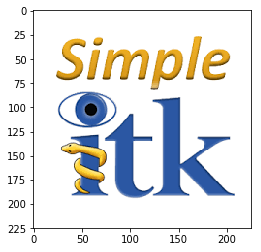

In [3]:
import os
from skimage.io import imread

# define name of image file #
filename = os.path.abspath('simpleitk.png')  # TODO: insert filename (see below) #

# TODO: load the image 'simpleitk.png' #
image = imread('simpleitk.png')

# TODO: plot the loaded image #
plt.figure() # TODO: create the figure #
plt.imshow(image)  # TODO: plot the image #
plt.show()  # TODO: make everything visible #

##### Task 4.1

Try now to use the rotation function of _scikit-image_ on 'image'!

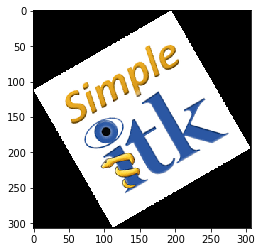

In [7]:
# TODO: import scikit-image's rotation function #
# ... #  # HINT: Use the search function in the docs. It really works! :) #
from scipy.ndimage import rotate

# define a rotation angle #
angle2 = 30

# TODO: rotate 'image'; specify the following arguments: input, angle #
image_rot = rotate(image,angle2)

# TODO: plot the rotated image #
plt.figure()
plt.imshow(image_rot) # This time you manage on your own, don't you? ;) #
plt.show()

Of course, there is also a function to output an image. It is located in the same package as _imread_. Check the documentation page!

##### Task 4.2

Save the rotated image to disc! Check if it worked!

In [8]:
# TODO: imports #
import os
from skimage.io import imsave

# TODO: save 'image_rot' #
imsave("Image_to_save.png",image_rot)

# SimpleITK <img src="simpleitk.png" width="150px" style="display:inline" align="right">

This libary is providing python wrappers for the famous _Insight Segmentation and Registration Toolkit_ (ITK). While ITK is a powerful tool when it comes to tasks related to segmentation or registration, using it its bare API can require quite sophisticated code. Compared to that, SimpleITK features a convenient approach to ITK with simpler function signatures and high code readability. Note the different use cases of _SimpleITK_ mainly for segmentation and registration compared to _scikit-image_ for more basic tasks like feature detection, filtering, etc.

In this lab, we will briefly introduce the basic image class and some of its properties. More detailed instructions will follow in subsequent labs.

### Image I/O

As we saw in the previous section, _scikit-image_ provides functionality for reading and writing images. However, this is intended for two-dimensional images only. In contrast to that, _SimpleITK_ is able to read arbitraryly shaped images and further supports more image formats like DICOM or NIFTI.

##### Task 5.1

Read the image 'image_head.dcm' (it is DICOM format)! You find an example in http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/03_Image_Details.html (see second code cell).

In [11]:
import SimpleITK as sitk


# define name of image file #
filename = os.path.abspath('image_head.dcm')

# TODO: read the image #

im_obj = sitk.ReadImage(filename)

RuntimeError: Exception thrown in SimpleITK ReadImage: C:\d\VS14-Win64-pkg\SimpleITK\Code\IO\src\sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "C:\Users\Andrés\Desktop\image_head.dcm" does not exist.

### The SimpleITK Image object

In _SimpleITK_ an image (like 'im_obj') is not a simple numpy array, but comprises a lot of meta data as well as functions to access the actual image and meta data.

##### Task 5.2

Check the type of 'im_obj'! (Check the second code cell if you don't remember how to do it ;) )

In [ ]:
# TODO: print the type of 'im_obj' #
print("The type of 'im_obj' is {}.".format(type(im_obj)))

Too see which information you might retrieve from an 'Image' object, you can use the command 'dir'. It will print a lot of functions. However, you should focus on those on the top (without the trailing '__').

In [ ]:
dir(sitk.Image)

Some interesting commands are
 * GetSize
 * GetSpacing
 * GetDimension
 * GetDepth
 * GetHeight
 * GetWidth
 * GetNumberOfComponentsPerPixel.

##### Task 5.3

Retrieve the mentioned information from the image object! Do you understand their meaning? If not, have a look at the IPython notebook tutorial specified above.

In [ ]:
print("Size: {}".format(# ... #))
print("Spacing: {}".format(# ... #))
print("Dimension: {}".format(# ... #))
print("Depth: {}".format(# ... #))
print("Height: {}".format(# ... #))
print("Width: {}".format(# ... #))
print("NumberOfComponentsPerPixel: {}".format(# ... #))

To retrieve all that information at once it is possible to just print the whole object directly.

In [ ]:
print(im_obj)

### Data access

Of course one is usually interested in accessing the image data directly. For that purpose _SimpleITK_ provides a function _GetArrayViewFromImage_ which returns a 'ndarray' of the given image. The term '_view_' indicates, that the data in the 'ndarray' is exactly the same as in the image object, i.e. if the array is modified the image object is as well.

##### Task 5.4

Use the _GetArrayViewFromImage_ function to plot the loaded image with pyplot's _imshow_ as you did above!

In [ ]:
# TODO: obtain 'ndarray' #
im_array = # ... #

NOTE: The dimensionality of 'im_array' must be 2D for plotting. You can remove all singular dimensions of an 'ndarray' using the function _squeeze_ (as in Matlab).

In [ ]:
# remove singular dimensions of 'im_array' #
im_array = im_array.squeeze()

Now you're ready to plot :)

In [ ]:
# TODO: plot the image #
# ... #
# ... #
# ... #

# MeVisLab <img src="mevislab.jpeg" width="100px" style="display:inline" align="right">

The software _MeVisLab_ is a freely available tool for medical image processing and visualisation. It has a standalone graphical user interface and its common usage is based on _graphical programming_. This enables the user to easily create a processing pipeline by simply arranging algorithm objects and connecting them with each other.

While it provides a wide range of functionalities (probably everything that we do in the labs here), we focus on how to use it for visualisation purposes which might be useful to you in some of the upcomming labs.

**NOTE**: In order to find a specific module, use the search bar on top of the _MeVisLab_ GUI.

### Reading an image <img src="mevislab_read.png" width="400px" style="display:inline" align="right">

For reading image files the following two modules are most useful:
 * _DirectDicomImport_  -  reading dicom files
 * _itkImageFileReader_  -  reading any other image file e.g. NIFTI, png, ...

##### Task 6.1

Find the _itkImageFileReader_ for loading an image and put it into your workspace! Double-click on the icon, locate an image file (e.g. 'matplotlib.png') and press the 'Open' button.

### Visualising an image

There are two interesting modules for visualising image data in a simple way:
 * _View2D_
 * _View3D_.

##### Task 6.2

Put one of the mentioned image viewer modules into your workspace. Then connect the leftmost triangle of the image reader with the one of the viewer module by _drag and drop_. Double-click on the viewer to see the image!

##### Task 6.3

Now load the dicom image ('image_head.dcm') by using the module _DirectDicomImport_ (include module in workspace, double click on icon, specify folder as _Source Dir_, press 'Import' button) and use the other viewer module to view the image!

# Congratulations!

You have managed to work through this lab! Well done! :) Now tell your lab assistant what you did and you're done ...